In [5]:
import pandas as pd
from pandas import Series, DataFrame

In [6]:
titanic_df = pd.read_csv('train.csv')

In [4]:
titanic_df.head(10) #Some data shown

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
titanic_df.info() #info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Who were the passengers on the Titanic?

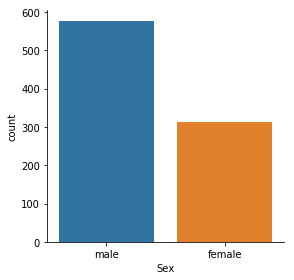

In [8]:
sns.factorplot(x='Sex',data = titanic_df,kind='count') #for counting number of males and females #kind='count'(for Py3)

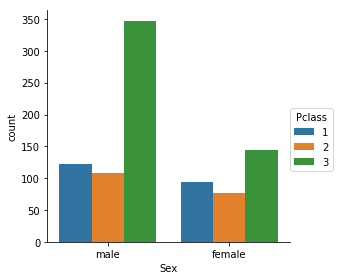

In [10]:
sns.factorplot(x='Sex',data = titanic_df,kind='count', hue='Pclass') #males n females as per Pessenger-Class

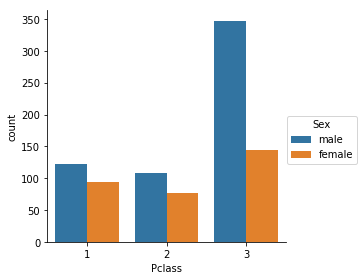

In [12]:
sns.factorplot(x='Pclass',data = titanic_df,kind='count', hue='Sex') #males n females as per Passenger-Class

In [13]:
def male_female_child(passenger):
    age,sex= passenger
    if age<18:
        return 'child'
    else:
        return sex

In [16]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1) #adding a column of person for category

In [18]:
titanic_df[:10]  #first 10 Columns of DataSet

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


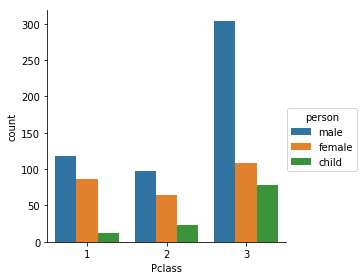

In [20]:
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='person') #now child also inculded in the graph

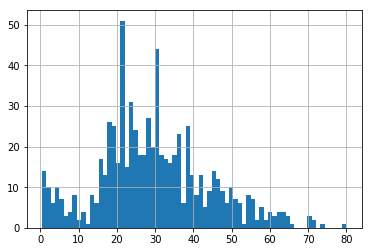

In [22]:
titanic_df['Age'].hist(bins=70)

In [24]:
titanic_df['Age'].mean() #mean age 

29.69911764705882

In [26]:
titanic_df['person'].value_counts() #total count as per data

male      519
female    259
child     113
Name: person, dtype: int64

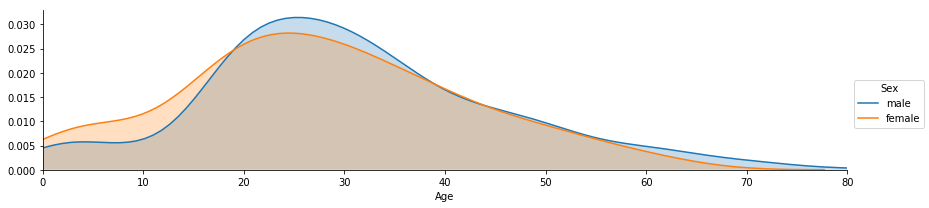

In [30]:
#KDE Plot section :-
fig= sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)  # maping age of the passengers wrt sex

oldest = titanic_df['Age'].max() # max age

fig.set(xlim=(0,oldest))  #limit define for the x-axis
fig.add_legend()

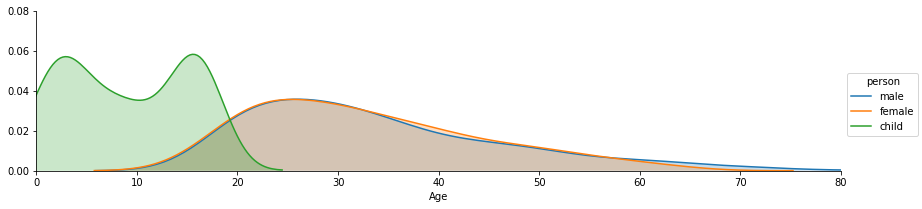

In [43]:
fig= sns.FacetGrid(titanic_df,hue='person',aspect=4)  #child also inculde in it
fig.map(sns.kdeplot,'Age',shade=True)  # maping age of the passengers wrt sex

oldest = titanic_df['Age'].max() # max age

fig.set(xlim=(0,oldest),ylim=(0,0.08))  #limit define for the x-axis & y- axis
fig.add_legend()

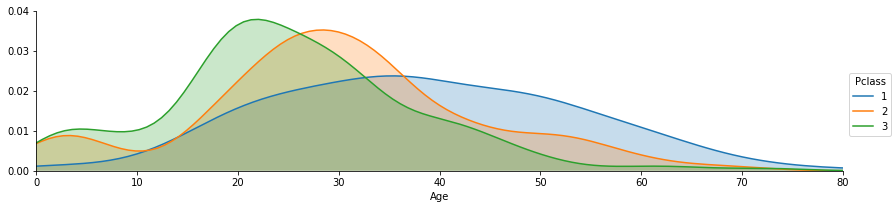

In [47]:
fig= sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)  # maping age of the passengers wrt sex

oldest = titanic_df['Age'].max() # max age

fig.set(xlim=(0,oldest),ylim=(0,0.04))  #limit define for the x-axis
fig.add_legend()

In [48]:
#Question 2: - What deck were the passengers on and how does that relate to their class?


In [50]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [53]:
deck = titanic_df['Cabin'].dropna() #drop NA from dataset # using Cabin column for checking deck
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

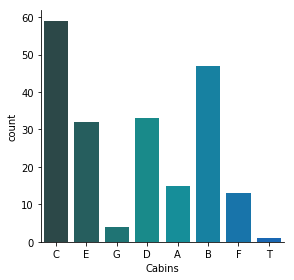

In [62]:
levels = [] #for getting first letter from deck
for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels) #making dataframe of cabins
cabin_df.columns = ['Cabins'] #adding column name to the cabin
sns.factorplot('Cabins',data=cabin_df,palette='winter_d',kind='count')

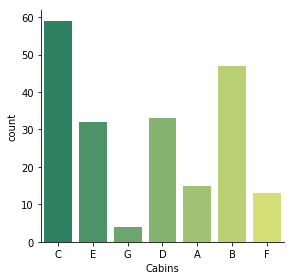

In [76]:
cabin_df = cabin_df[cabin_df.Cabins != 'T'] #exculding the T cabin bcz its odd one out from cabins
sns.factorplot('Cabins',data= cabin_df,palette='summer', kind='count')

In [78]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [79]:
#Question - 3 Where did the passengers comes from?

#Embarked - Passenger's City
#C = Cherbourg 
#Q = Queenstown 
#S = Southampton

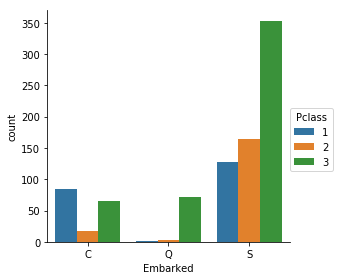

In [85]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',kind='count',order=['C','Q','S'])

In [86]:
#Question : 4 Who was alone and who was with family?

In [88]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [109]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [111]:
titanic_df['Alone'].apply(str)
titanic_df['Alone'].loc[titanic_df['Alone'] !=0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\Vishal\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [101]:
url_info = 'http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy' #for error

In [113]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


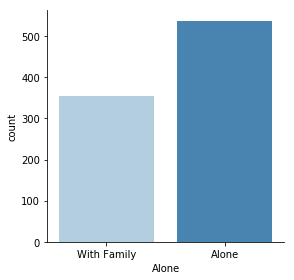

In [116]:
sns.factorplot('Alone',data=titanic_df,palette= 'Blues',kind='count') #data shown for alone/ with Family

In [117]:
#Question : 5 (Most Interesting Question) What factors helped someone survive the sinking?

In [120]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'No',1:'Yes'}) #using Column Survived
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No


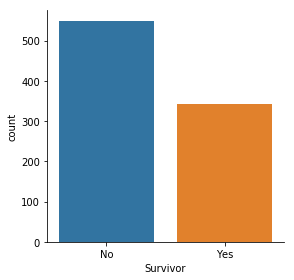

In [122]:
sns.factorplot('Survivor',data=titanic_df,kind='count')

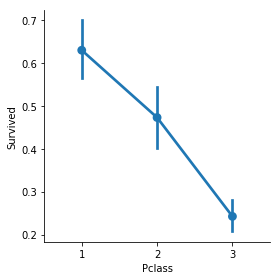

In [124]:
sns.factorplot('Pclass','Survived',data=titanic_df)

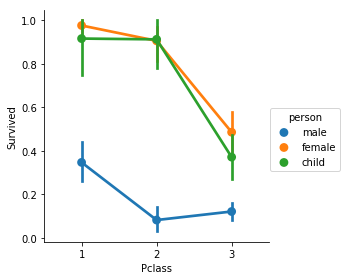

In [126]:
sns.factorplot('Pclass','Survived',data=titanic_df,hue='person')

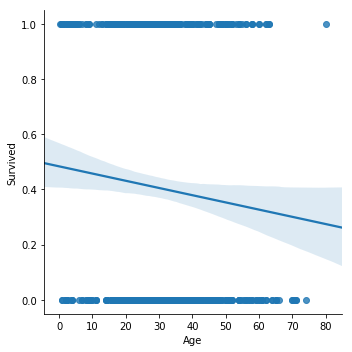

In [131]:
sns.lmplot('Age','Survived',data=titanic_df)
#younger ones has high rate of survivor

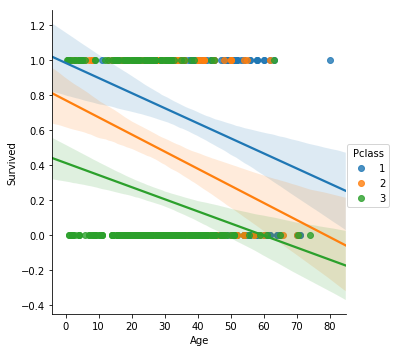

In [133]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass')
#better graph below IN-line

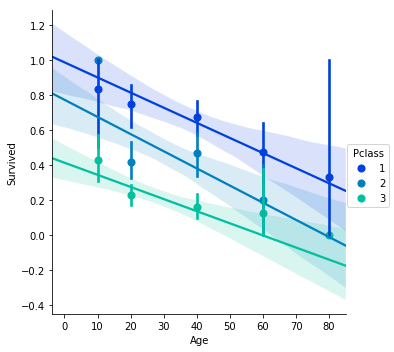

In [136]:
generation= [10,20,40,60,80]
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',palette ='winter',x_bins= generation)
#pclass = 1 has higher survivor rate and Younger ones has highest in it

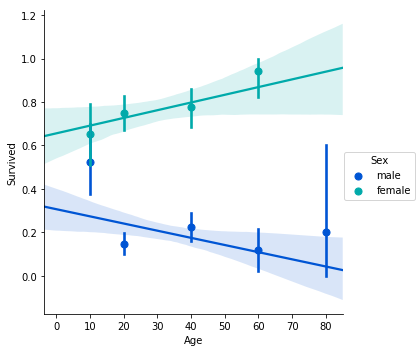

In [138]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Sex',palette ='winter',x_bins= generation) 
#older the women better survivor chances
#younger the men better survivor chances